# Aula 06 - netCDF

Nesta aula trabalharemos com dados 3 ou 4 d em formatdo netCDF, utilizamos o pacote https://docs.xarray.dev/en/stable/ e trabalharemos com os dados da plataforma https://disc.gsfc.nasa.gov/

# Baixando os dados do GESDISC
Crie um login para você

Digite uma palavra-chave que descreva o dado que desejar

Baixe o dado para um determinado período

https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary?keywords=air%20quality

https://github.com/nasa/gesdisc-tutorials/blob/main/notebooks/How_to_Access_GES_DISC_Data_Using_Python.ipynb



In [7]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r"C:\Users\marcos perrude\Documents\ENS410064\dados"
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\marcos perrude\Documents\ENS410064\scripts
['1728675725931.csv', 'analisepoluentes', 'BR_Pais_2022 (1)', 'BR_Pais_2022 (1).zip', 'BR_UF_2022 (1)', 'BR_UF_2022 (1).zip', 'dados', 'EZ_AERMOD_Marcos_2024-11-14', 'FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4', 'metar (4).csv', 'metar_FOR_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv', 'Nova pasta', 'PRcsv.csv', 'resultado_hora.csv', 'resultado_mes.csv']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4']


In [8]:
# Abrir arquivos do MERRA utilizando o xarray
import xarray as xr
import netCDF4 as nc
dataset = nc.Dataset(pastaDados+ '\\'+prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Comment: filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions: CF-1
    Institution: NASA Goddard Space Flight Center
    References: http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: V1
    TemporalRange: 2000-01-01 -> 2024-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: MERRA2_CNN_HAQAST_PM25
    GranuleID: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    ProductionDateTime: 2024-06-25T01:34:15.870456Z
    LongName: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    title: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    SouthernmostLatitude: -90.0
    NorthernmostLatitude: 90.0
    WesternmostLongitude: -180.0
  

In [9]:
#Acessando o dado de pm25

pm25 = dataset['MERRA2_CNN_Surface_PM25'][:]
print(pm25.shape) #(time,lat,lon)

(24, 361, 576)


35.0
-55.0


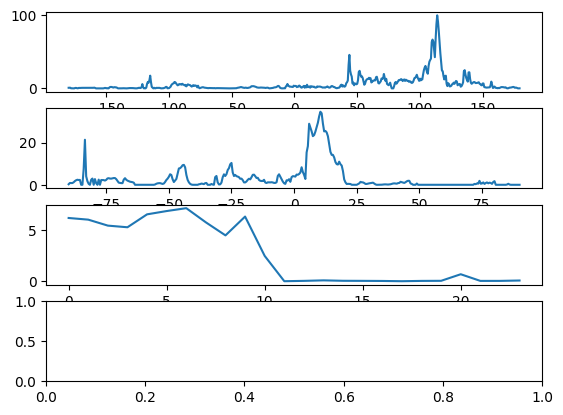

In [10]:
import matplotlib.pyplot as plt

#para o tempo - time = 0 em y = 250

fig, ax = plt.subplots(4)
ax[0].plot(dataset['lon'][:],pm25[0,250,:])
print(dataset['lat'][250])

ax[1].plot(dataset['lat'][:],pm25[0,:,200])

print(dataset['lon'][200])

#Para um ponrto em todo tempo

ax[2].plot(dataset['time'][:],pm25[:,250,100])  #o horario esta ruim pois nao esta no fuso de greenwhich



0   -73.99045
Name: minx, dtype: float64


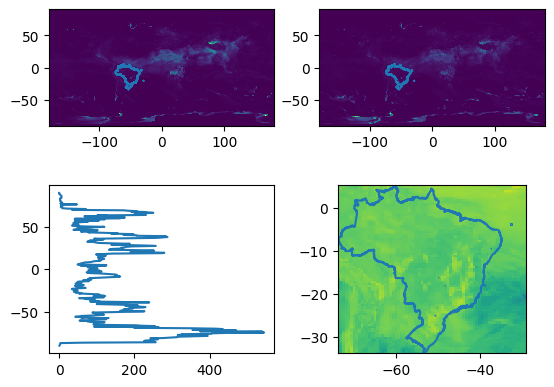

In [11]:
#Operações com numoy
import numpy as np
import geopandas as gpd
import matplotlib 
fig,ax = plt.subplots(2,2)
br = gpd.read_file(r"C:\Users\marcos perrude\Documents\ENS410064\dados\BR_Pais_2022 (1)\BR_Pais_2022.shp")

#Média do dia em todos os locais
ax[0,0].pcolor(dataset['lon'][:],dataset['lat'][:],np.mean(pm25, axis=0))
br.boundary.plot(ax=ax[0,0])

ax[0,1].pcolor(dataset['lon'][:],dataset['lat'][:],np.max(pm25, axis=0))
br.boundary.plot(ax=ax[0,1])

ax[1,1].pcolor(dataset['lon'][:], dataset['lat'],np.max(pm25,axis=0),
              norm=matplotlib.colors.LogNorm())
br.boundary.plot(ax=ax[1,1])
print(br.bounds.minx)
ax[1,1].set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax[1,1].set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])

#Maxima emissao em todas as latitudes
ax[1,0].plot(np.max(np.max(pm25[:,:,:],axis=0),axis=1),dataset['lat'][:])

In [23]:

os.chdir(pastaDados)
import xarray as xr
xds = xr.open_mfdataset(prefixed)  
xds

pm25 = xds['MERRA2_CNN_Surface_PM25'][:]
pm25

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (time: 48, lat: 361, lon: 576)> Size: 40MB
dask.array<concatenate, shape=(48, 361, 576), dtype=float32, chunksize=(1, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 384B 2024-05-05T00:30:00 ... 2024-05-06T23...
  * lat      (lat) float32 1kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 2kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      ug m-3
    long_name:  Bias corrected surface total PM2.5 mass concentration

In [ ]:
git